## Javier Mombiela
## Carnet: 20067
## 12 de abril 2024

### Proyecto 2: Entrenamiento Incremental en Modelos de Deep Learning y Machine Learning

Importando librerias

In [86]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.regularizers import l2
from geopy.distance import geodesic
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve, accuracy_score

### Análisis Exploratorio

In [87]:
df = pd.read_csv('fraud_feature_engineering_example.csv')

df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,amt_month,amt_year,amt_month_shopping_net_spend,count_month_shopping_net,first_time_at_merchant
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,4.97,4.97,0.0,0.0,True
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,107.23,107.23,0.0,0.0,True
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,220.11,220.11,0.0,0.0,True
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,45.00,45.00,0.0,0.0,True
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,41.96,41.96,0.0,0.0,True


In [88]:
# Información general sobre el dataset
print("\nInformación del dataset:")
print(df.info())


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 27 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   trans_date_trans_time         object 
 1   cc_num                        int64  
 2   merchant                      object 
 3   category                      object 
 4   amt                           float64
 5   first                         object 
 6   last                          object 
 7   gender                        object 
 8   street                        object 
 9   city                          object 
 10  state                         object 
 11  zip                           int64  
 12  lat                           float64
 13  long                          float64
 14  city_pop                      int64  
 15  job                           object 
 16  dob                           object 
 17  trans_num                     object 
 

In [89]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas del dataset:")
print(df.describe())


Estadísticas descriptivas del dataset:
             cc_num           amt           zip           lat          long  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   4.173860e+17  7.006357e+01  4.881326e+04  3.853931e+01 -9.022783e+01   
std    1.309115e+18  1.592540e+02  2.688185e+04  5.071470e+00  1.374789e+01   
min    6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01 -1.656723e+02   
25%    1.800429e+14  9.640000e+00  2.623700e+04  3.466890e+01 -9.679800e+01   
50%    3.521417e+15  4.745000e+01  4.817400e+04  3.935430e+01 -8.747690e+01   
75%    4.642255e+15  8.310000e+01  7.204200e+04  4.194040e+01 -8.015800e+01   
max    4.992346e+18  2.894890e+04  9.992100e+04  6.669330e+01 -6.795030e+01   

           city_pop     unix_time     merch_lat    merch_long      is_fraud  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   8.864367e+04  1.358674e+09  3.853898e+01 -9.022794e+01  5.210015e-03   
std    3.01

In [90]:
# Manejo de valores faltantes
missing_values = df.isnull().sum()
print("\nValores faltantes por columna:")
print(missing_values)


Valores faltantes por columna:
trans_date_trans_time           0
cc_num                          0
merchant                        0
category                        0
amt                             0
first                           0
last                            0
gender                          0
street                          0
city                            0
state                           0
zip                             0
lat                             0
long                            0
city_pop                        0
job                             0
dob                             0
trans_num                       0
unix_time                       0
merch_lat                       0
merch_long                      0
is_fraud                        0
amt_month                       0
amt_year                        0
amt_month_shopping_net_spend    0
count_month_shopping_net        0
first_time_at_merchant          0
dtype: int64


In [91]:
# Distribución de clases
class_distribution = df['is_fraud'].value_counts()
print("\nDistribución de clases:")
print(class_distribution)


Distribución de clases:
is_fraud
0    1842743
1       9651
Name: count, dtype: int64


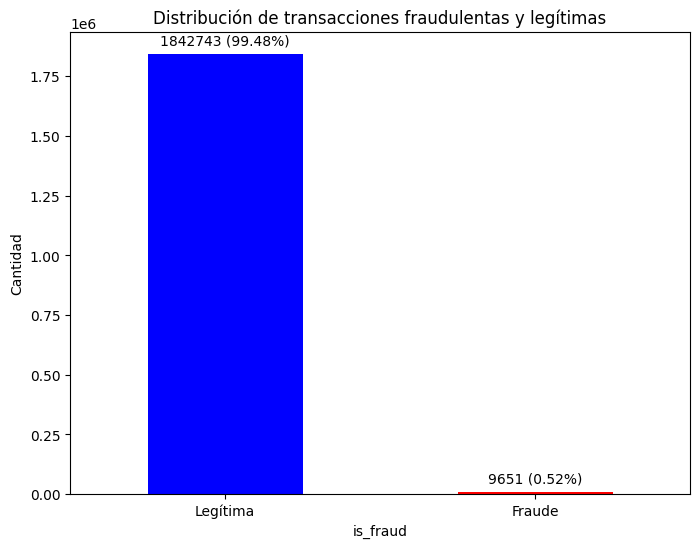

In [92]:
# Calcular la cantidad de transacciones fraudulentas y legítimas
fraud_counts = df['is_fraud'].value_counts()
total_transactions = fraud_counts.sum()

# Visualizar la distribución de la variable objetivo 'is_fraud'
plt.figure(figsize=(8, 6))
fraud_counts.plot(kind='bar', color=['blue', 'red'])
plt.title('Distribución de transacciones fraudulentas y legítimas')
plt.xlabel('is_fraud')
plt.ylabel('Cantidad')
plt.xticks([0, 1], ['Legítima', 'Fraude'], rotation=0)

# Mostrar la proporción en el gráfico
for i, count in enumerate(fraud_counts):
    plt.text(i, count + total_transactions * 0.02, f"{count} ({count / total_transactions:.2%})", ha='center')

plt.show()

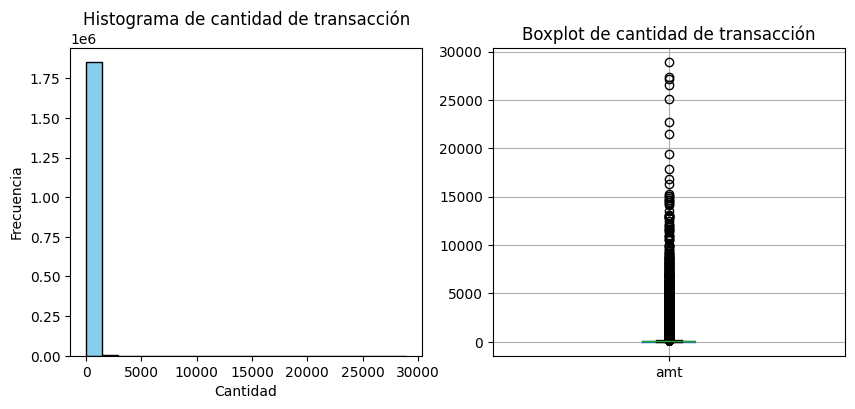

In [93]:
# Histograma y boxplot para la variable 'amt' (cantidad de transacción)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
df['amt'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de cantidad de transacción')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
df.boxplot(column='amt', showfliers=True)
plt.title('Boxplot de cantidad de transacción')

plt.show()

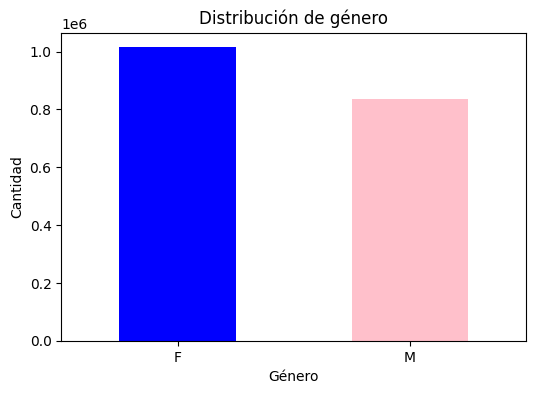

In [94]:
# Gráfico de barras para la variable 'gender'
plt.figure(figsize=(6, 4))
df['gender'].value_counts().plot(kind='bar', color=['blue', 'pink'])
plt.title('Distribución de género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)
plt.show()

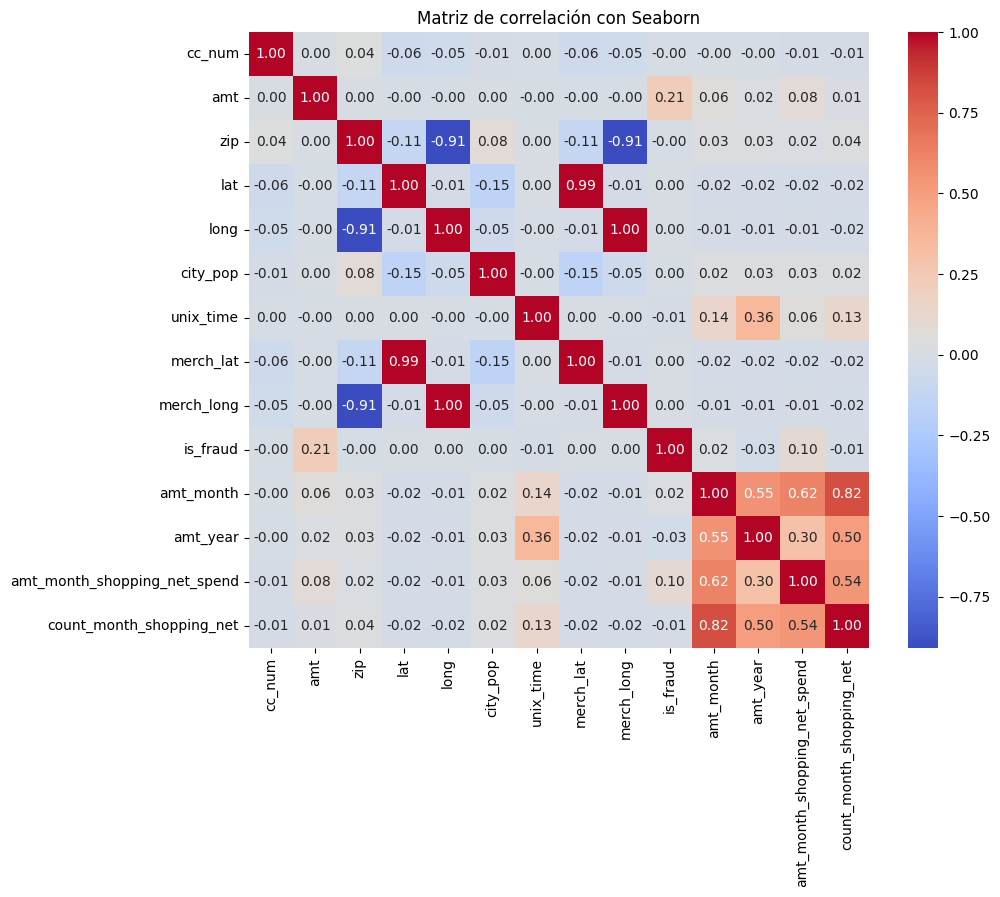

In [95]:
# Matriz de correlación
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación con Seaborn')
plt.show()

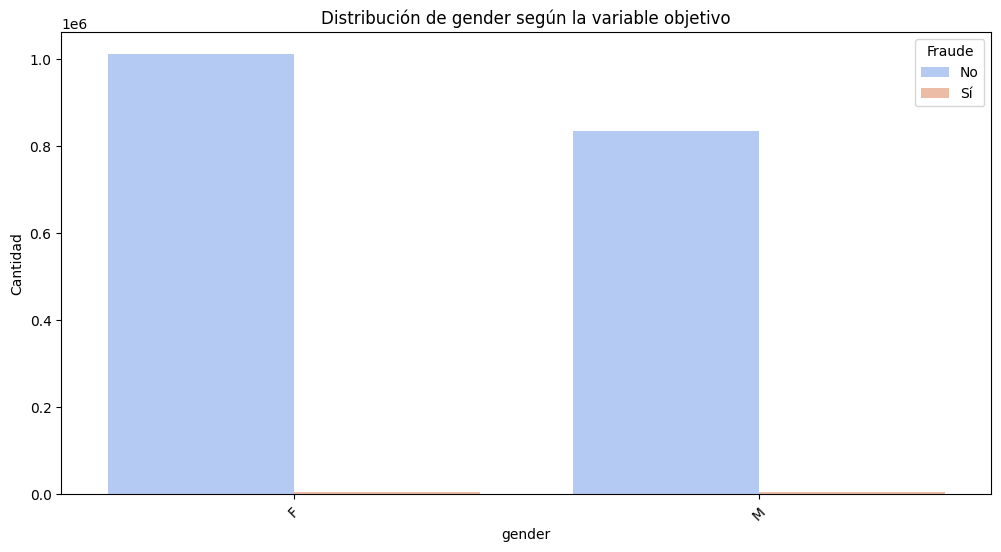

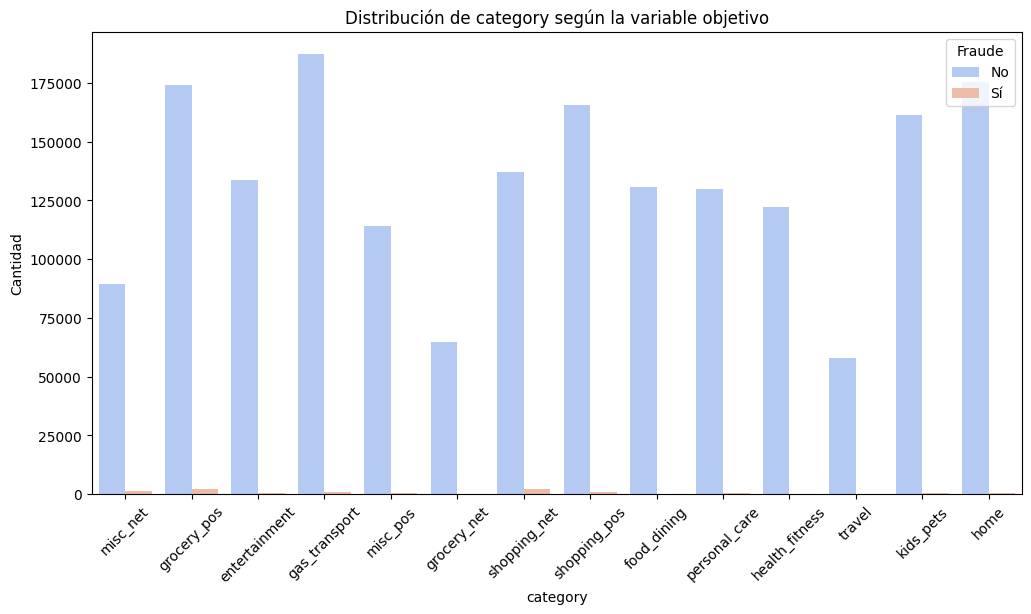

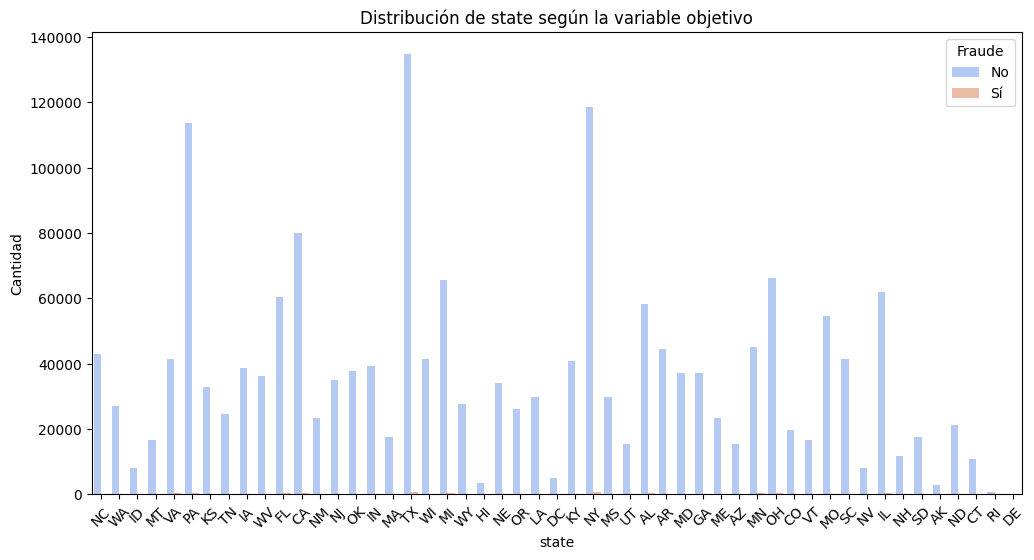

In [96]:
# Gráficos de barras para variables categóricas
categorical_variables = ['gender', 'category', 'state']  # Lista de variables categóricas que deseas explorar

for column in categorical_variables:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=column, hue='is_fraud', palette='coolwarm')
    plt.title(f'Distribución de {column} según la variable objetivo')
    plt.xlabel(column)
    plt.ylabel('Cantidad')
    plt.xticks(rotation=45)
    plt.legend(title='Fraude', loc='upper right', labels=['No', 'Sí'])
    plt.show()

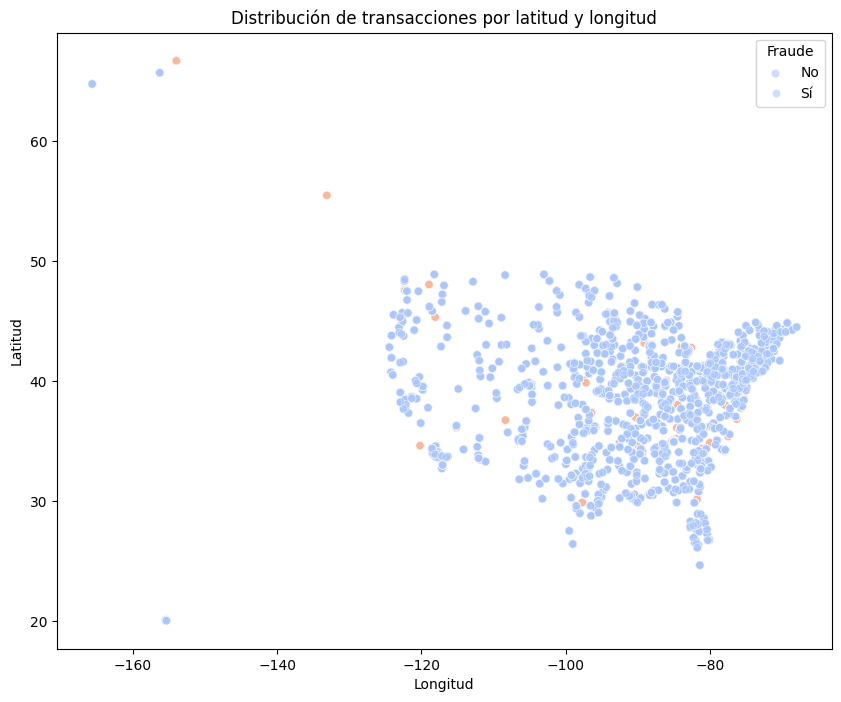

In [97]:
# Gráfico de densidad de dispersión
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='long', y='lat', hue='is_fraud', palette='coolwarm', alpha=0.6)
plt.title('Distribución de transacciones por latitud y longitud')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Fraude', loc='upper right', labels=['No', 'Sí'])
plt.show()

### Feature Engineering

Agregando caracteristicas basadas en tiempo

In [98]:
# Convertir la columna 'trans_date_trans_time' a formato de fecha y hora
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Agregar características temporales
df['hour_of_day'] = df['trans_date_trans_time'].dt.hour
df['day_of_week'] = df['trans_date_trans_time'].dt.dayofweek  # Lunes=0, Domingo=6
df['month'] = df['trans_date_trans_time'].dt.month
df['year'] = df['trans_date_trans_time'].dt.year

# Mostrar las primeras filas del conjunto de datos para verificar las nuevas características
df[['trans_date_trans_time', 'hour_of_day', 'day_of_week', 'month', 'year']].head()

,trans_date_trans_time,hour_of_day,day_of_week,month,year
0,2019-01-01 00:00:18,0,1,1,2019
1,2019-01-01 00:00:44,0,1,1,2019
2,2019-01-01 00:00:51,0,1,1,2019
3,2019-01-01 00:01:16,0,1,1,2019
4,2019-01-01 00:03:06,0,1,1,2019


Agregando caracteristicas basadas en el monto

In [99]:
# Calcular el monto promedio de transacción por cliente
avg_transaction_amt_by_customer = df.groupby('cc_num')['amt'].mean()
df['avg_transaction_amt'] = df['cc_num'].map(avg_transaction_amt_by_customer)

# Calcular la frecuencia de transacciones por cliente
transaction_count_by_customer = df['cc_num'].value_counts()
df['transaction_count'] = df['cc_num'].map(transaction_count_by_customer)

# Calcular la desviación estándar del monto de transacción por cliente
std_transaction_amt_by_customer = df.groupby('cc_num')['amt'].std()
df['std_transaction_amt'] = df['cc_num'].map(std_transaction_amt_by_customer)

# Mostrar las primeras filas del conjunto de datos para verificar las nuevas características
df[['amt', 'cc_num', 'avg_transaction_amt', 'std_transaction_amt', 'transaction_count']].head()


,amt,cc_num,avg_transaction_amt,std_transaction_amt,transaction_count
0,4.97,2703186189652095,89.408743,127.530101,2927
1,107.23,630423337322,56.078113,159.201852,4362
2,220.11,38859492057661,69.924272,116.688602,735
3,45.00,3534093764340240,80.090040,280.077880,743
4,41.96,375534208663984,95.341146,94.322842,2922


Agregando caracteristicas basadas en la geografia

In [100]:
# Calcular la diferencia entre la latitud y la longitud del cliente y del vendedor
df['customer_merchant_distance'] = np.sqrt((df['lat'] - df['merch_lat'])**2 + (df['long'] - df['merch_long'])**2)

# Mostrar las primeras filas del conjunto de datos para verificar la nueva característica
df[['lat', 'long', 'merch_lat', 'merch_long', 'customer_merchant_distance']].head()

,lat,long,merch_lat,merch_long,customer_merchant_distance
0,36.0788,-81.1781,36.011293,-82.048315,0.872830
1,48.8878,-118.2105,49.159047,-118.186462,0.272310
2,42.1808,-112.2620,43.150704,-112.154481,0.975845
3,46.2306,-112.1138,47.034331,-112.561071,0.919802
4,38.4207,-79.4629,38.674999,-78.632459,0.868505


Aplicando Label Encoder a las variables categoricas

In [101]:
# Inicializar LabelEncoder
label_encoder = LabelEncoder()

# Codificar variables categóricas
df['state'] = label_encoder.fit_transform(df['state'])
df['gender'] = label_encoder.fit_transform(df['gender'])
df['category'] = label_encoder.fit_transform(df['category'])
df['first_time_at_merchant'] = label_encoder.fit_transform(df['first_time_at_merchant'])

Eliminando variables innecesarias

In [102]:
# Variables a eliminar
variables_a_eliminar = ['trans_date_trans_time','trans_num', 'first', 'last', 'street', 'city', 'merchant', 'lat', 'long', 'city_pop', 'dob', 'unix_time', 'merch_lat', 'merch_long', 'cc_num', 'job']

# Eliminar las variables del conjunto de datos
df = df.drop(variables_a_eliminar, axis=1)

# Mostrar las primeras filas del conjunto de datos para verificar los cambios
df.head()

,category,amt,gender,state,zip,is_fraud,amt_month,amt_year,amt_month_shopping_net_spend,count_month_shopping_net,first_time_at_merchant,hour_of_day,day_of_week,month,year,avg_transaction_amt,transaction_count,std_transaction_amt,customer_merchant_distance
0,8,4.97,0,27,28654,0,4.97,4.97,0.0,0.0,1,0,1,1,2019,89.408743,2927,127.530101,0.872830
1,4,107.23,0,47,99160,0,107.23,107.23,0.0,0.0,1,0,1,1,2019,56.078113,4362,159.201852,0.272310
2,0,220.11,1,13,83252,0,220.11,220.11,0.0,0.0,1,0,1,1,2019,69.924272,735,116.688602,0.975845
3,2,45.00,1,26,59632,0,45.00,45.00,0.0,0.0,1,0,1,1,2019,80.090040,743,280.077880,0.919802
4,9,41.96,1,45,24433,0,41.96,41.96,0.0,0.0,1,0,1,1,2019,95.341146,2922,94.322842,0.868505


Guardando el dataset en un nuevo archivo

In [103]:
# guardar el dataframe modificado
df.to_csv('processed.csv', index=False)

df.head()

,category,amt,gender,state,zip,is_fraud,amt_month,amt_year,amt_month_shopping_net_spend,count_month_shopping_net,first_time_at_merchant,hour_of_day,day_of_week,month,year,avg_transaction_amt,transaction_count,std_transaction_amt,customer_merchant_distance
0,8,4.97,0,27,28654,0,4.97,4.97,0.0,0.0,1,0,1,1,2019,89.408743,2927,127.530101,0.872830
1,4,107.23,0,47,99160,0,107.23,107.23,0.0,0.0,1,0,1,1,2019,56.078113,4362,159.201852,0.272310
2,0,220.11,1,13,83252,0,220.11,220.11,0.0,0.0,1,0,1,1,2019,69.924272,735,116.688602,0.975845
3,2,45.00,1,26,59632,0,45.00,45.00,0.0,0.0,1,0,1,1,2019,80.090040,743,280.077880,0.919802
4,9,41.96,1,45,24433,0,41.96,41.96,0.0,0.0,1,0,1,1,2019,95.341146,2922,94.322842,0.868505


### SMOTE y Division de Datos

In [104]:
df_processed = pd.read_csv('processed.csv')

print(df_processed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 19 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   category                      int64  
 1   amt                           float64
 2   gender                        int64  
 3   state                         int64  
 4   zip                           int64  
 5   is_fraud                      int64  
 6   amt_month                     float64
 7   amt_year                      float64
 8   amt_month_shopping_net_spend  float64
 9   count_month_shopping_net      float64
 10  first_time_at_merchant        int64  
 11  hour_of_day                   int64  
 12  day_of_week                   int64  
 13  month                         int64  
 14  year                          int64  
 15  avg_transaction_amt           float64
 16  transaction_count             int64  
 17  std_transaction_amt           float64
 18  customer_merchant_dist

In [105]:
# Filtrar los datos del año 2019
df_2019 = df[df['year'] == 2019]

# Seleccionar características (X) y variable objetivo (y)
X = df_2019.drop('is_fraud', axis=1)
y = df_2019['is_fraud']

# Dividir el conjunto de datos del año 2019 en Train y Test
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividir el conjunto de entrenamiento en Train y Dev
X_train, X_dev, y_train, y_dev = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=42)

# Calcular la cantidad de transacciones fraudulentas y legítimas
non_fraudulent = len(y_train[y_train == 0])
fraudulent = non_fraudulent * 5

# Definir la estrategia de muestreo
sampling_strategy = {0: non_fraudulent, 1: fraudulent}

# Aplicar SMOTE solo al conjunto de entrenamiento
smote = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verificar las formas de los conjuntos de datos resultantes
print("Forma de X_train_resampled:", X_train_resampled.shape)
print("Forma de y_train_resampled:", y_train_resampled.shape)
print("Forma de X_dev:", X_dev.shape)
print("Forma de y_dev:", y_dev.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_test:", y_test.shape)

Forma de X_train_resampled: (3972906, 18)
Forma de y_train_resampled: (3972906,)
Forma de X_dev: (73988, 18)
Forma de y_dev: (73988,)
Forma de X_test: (184970, 18)
Forma de y_test: (184970,)


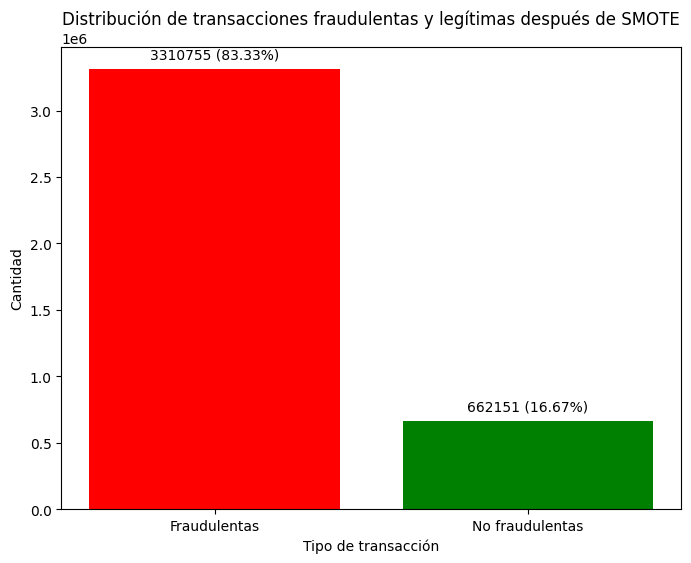

In [106]:
# Calcular la cantidad de transacciones fraudulentas y legítimas después de SMOTE
fraudulent_transactions_resampled = (y_train_resampled == 1).sum()
non_fraudulent_transactions_resampled = (y_train_resampled == 0).sum()
total_transactions_resampled = fraudulent_transactions_resampled + non_fraudulent_transactions_resampled

# Visualizar la distribución de transacciones fraudulentas y legítimas después de SMOTE
plt.figure(figsize=(8, 6))
plt.bar(['Fraudulentas', 'No fraudulentas'], [fraudulent_transactions_resampled, non_fraudulent_transactions_resampled], color=['red', 'green'])
plt.title('Distribución de transacciones fraudulentas y legítimas después de SMOTE')
plt.xlabel('Tipo de transacción')
plt.ylabel('Cantidad')

# Mostrar la proporción en el gráfico
for i, count in enumerate([fraudulent_transactions_resampled, non_fraudulent_transactions_resampled]):
    plt.text(i, count + total_transactions_resampled * 0.02, f"{count} ({count / total_transactions_resampled:.2%})", ha='center')

plt.show()

### Implementación de Modelos

In [107]:
def model_metrics(model, dtest, y_test, model_name):
    # Predecir sobre el conjunto de prueba
    y_pred_proba = model.predict(dtest)
    y_pred = [1 if pred > 0.5 else 0 for pred in y_pred_proba]

    # Calcular y mostrar las métricas de evaluación
    print(f"Rendimiento del modelo {model_name}:")
    print("ROC-AUC:", roc_auc_score(y_test, y_pred))
    print("Precisión:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1-score:", f1_score(y_test, y_pred))
    
    # Calcular la matriz de confusion
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
                xticklabels=["Non-Fraud", "Fraud"], 
                yticklabels=["Non-Fraud", "Fraud"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()
    
    # Calcular la curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Calcular la curva de precisión-recall
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

    # Graficar la curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    # Graficar la curva de precisión-recall
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='green', lw=2, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend(loc="lower left")
    plt.grid(True)
    plt.show()

#### XGBoost

In [108]:
# Convertir los datos al formato DMatrix de XGBoost
dtrain = xgb.DMatrix(X_train_resampled, label=y_train_resampled)
dtest = xgb.DMatrix(X_test)

# Definir los parámetros del modelo
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

# Entrenar el modelo XGBoost
num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_rounds)

# Guardar el modelo entrenado
xgb_model.save_model('XGB Models/xgb_model_2019.model')

c:\Users\rjmom\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:48:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


Rendimiento del modelo XGBoost:
ROC-AUC: 0.9614004138596796
Precisión: 0.2895348837209302
Recall: 0.9360902255639098
F1-score: 0.44227353463587915
Confusion Matrix:
[[181462   2444]
 [    68    996]]


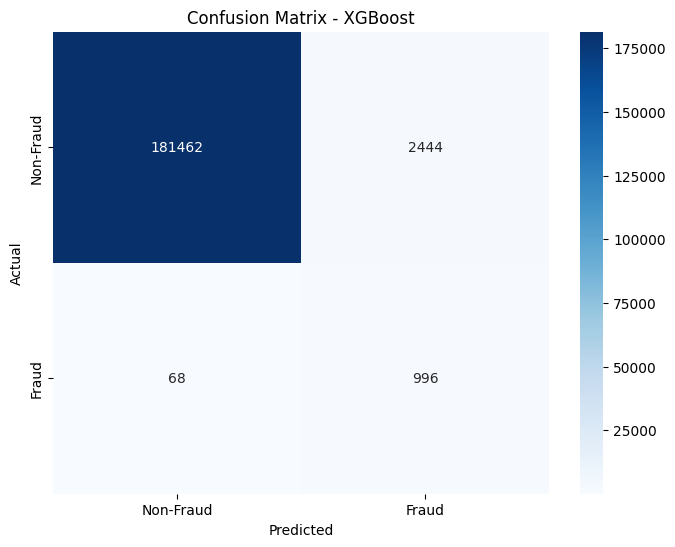

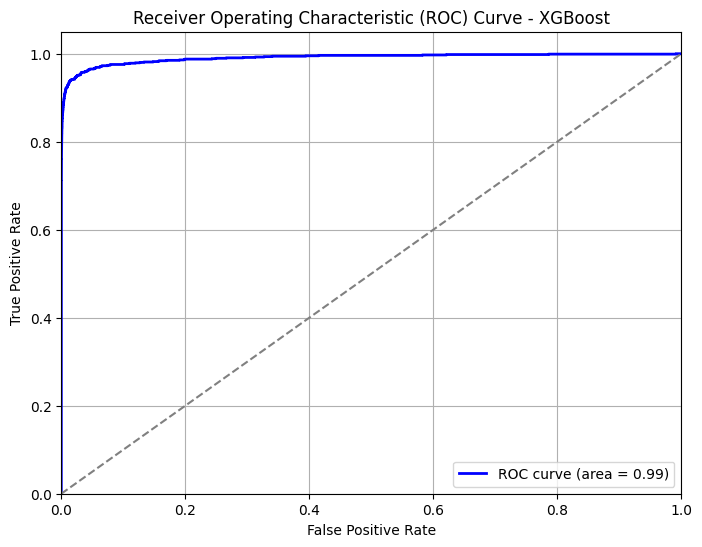

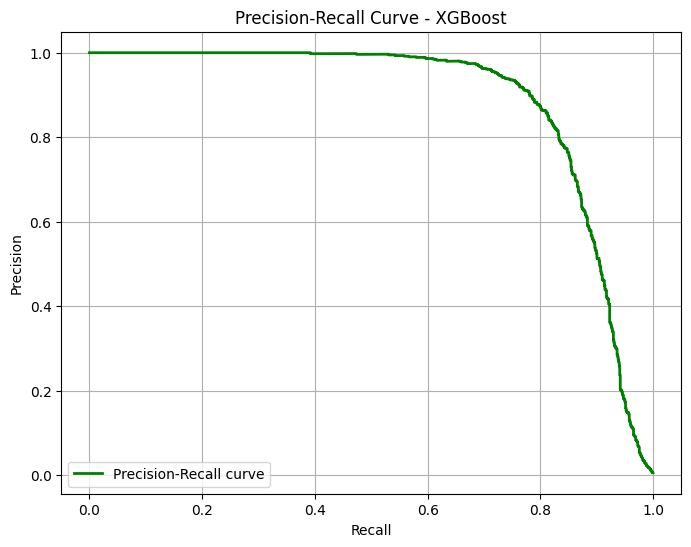

In [109]:
model_metrics(xgb_model, dtest, y_test, 'XGBoost')

#### ANN

In [114]:
from lightgbm import LGBMClassifier

# Crear un modelo de LightGBM
lgb_classifier = LGBMClassifier(random_state=42)

# Entrenar el modelo
lgb_classifier.fit(X_train_resampled, y_train_resampled)

# Guardar el modelo entrenado
joblib.dump(lgb_classifier, 'LGBM Models/lgb_model_2019.pkl')

[LightGBM] [Info] Number of positive: 3310755, number of negative: 662151
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.077017 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2642
[LightGBM] [Info] Number of data points in the train set: 3972906, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.833333 -> initscore=1.609438
[LightGBM] [Info] Start training from score 1.609438


['LGBM Models/lgb_model_2019.pkl']

5781/5781 ━━━━━━━━━━━━━━━━━━━━ 4s 688us/step
Rendimiento del modelo ANN:
ROC-AUC: 0.4718944967717653
Precisión: 0.004928972946030515
Recall: 0.33458646616541354
F1-score: 0.00971483149133579
Confusion Matrix:
[[112036  71870]
 [   708    356]]


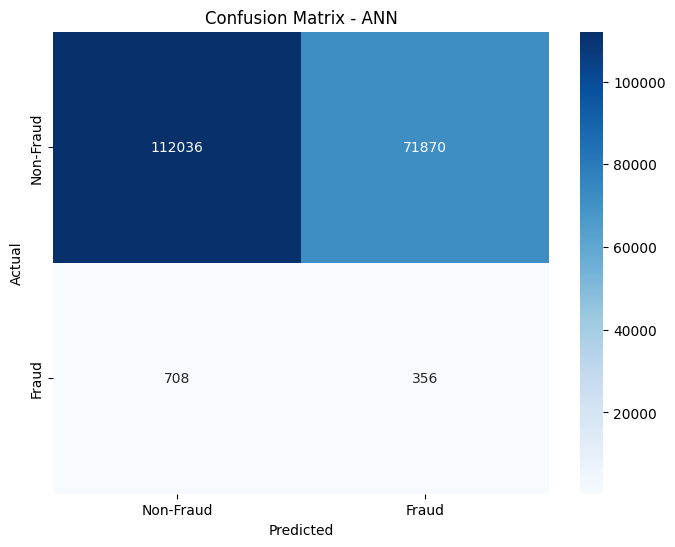

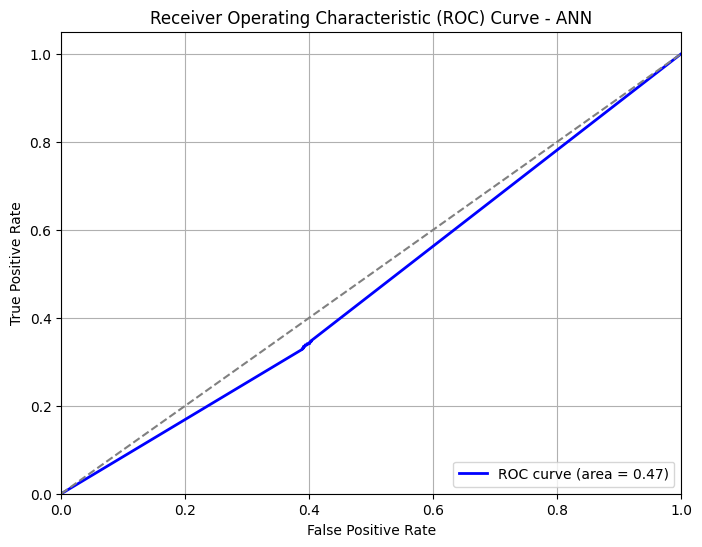

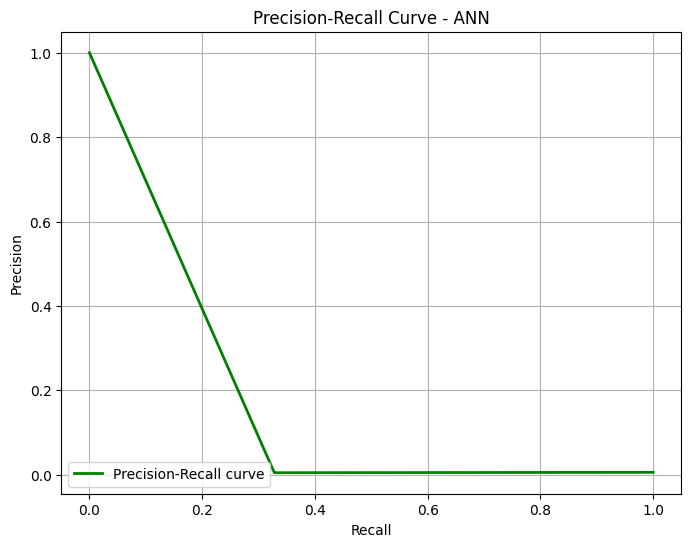

In [111]:
model_metrics(lgb_classifier, X_test, y_test, "LightGBM")